In [82]:
# import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [83]:
#send a request to the website
url = "https://books.toscrape.com/"


response = requests.get(url)

In [84]:
response

<Response [200]>

In [85]:
#check if the request was successful
if response.status_code == 200:
    print('Response Successful')
else:
    print('Response not Successful')

Response Successful


In [86]:
#Parse to HTML context
page = BeautifulSoup(response.content, 'html.parser')
page

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

In [87]:
#Find the page in the web page
books = page.find_all('article', class_='product_pod')
books

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thu

In [97]:
# Create lists to store the data
titles = []
prices = []
availability = []
ratings = []

# Mapping star rating text to numeric values
rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}

# Loop through each book and extract details
for book in books:
    title = book.find('h3').find('a')['title']
    price = book.find('p', class_='price_color').text
    availability_status = book.find('p', class_='instock availability').text.strip()
    rating_text = book.find('p', class_='star-rating')['class'][1]
    rating = rating_map[rating_text]  # Convert to numeric rating
    
    titles.append(title)
    prices.append(price)
    availability.append(availability_status)
    ratings.append(rating)

In [98]:
titles

['A Light in the Attic',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History of Humankind',
 'The Requiem Red',
 'The Dirty Little Secrets of Getting Your Dream Job',
 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
 'The Black Maria',
 'Starving Hearts (Triangular Trade Trilogy, #1)',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
 'Rip it Up and Start Again',
 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
 'Olio',
 'Mesaerion: The Best Science Fiction Stories 1800-1849',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

In [99]:
print(prices)

['£51.77', '£53.74', '£50.10', '£47.82', '£54.23', '£22.65', '£33.34', '£17.93', '£22.60', '£52.15', '£13.99', '£20.66', '£17.46', '£52.29', '£35.02', '£57.25', '£23.88', '£37.59', '£51.33', '£45.17']


In [100]:
print(availability)

['In stock', 'In stock', 'In stock', 'In stock', 'In stock', 'In stock', 'In stock', 'In stock', 'In stock', 'In stock', 'In stock', 'In stock', 'In stock', 'In stock', 'In stock', 'In stock', 'In stock', 'In stock', 'In stock', 'In stock']


In [105]:
# Create a DataFrame
df = pd.DataFrame({
    'Title': titles,
    'Price': prices,
    'Availability': availability,
    'Ratings': ratings
})

# Display the DataFrame
df

,Title,Price,Availability,Ratings
0,A Light in the Attic,£51.77,In stock,3
1,Tipping the Velvet,£53.74,In stock,1
2,Soumission,£50.10,In stock,1
3,Sharp Objects,£47.82,In stock,4
4,Sapiens: A Brief History of Humankind,£54.23,In stock,5
5,The Requiem Red,£22.65,In stock,1
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,In stock,4
7,The Coming Woman: A Novel Based on the Life of...,£17.93,In stock,3
8,The Boys in the Boat: Nine Americans and Their...,£22.60,In stock,4
9,The Black Maria,£52.15,In stock,1


##### The above dataframe shows the first page of the ebook store that was scraped.

### EDA

### Data Check

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         20 non-null     object
 1   Price         20 non-null     object
 2   Availability  20 non-null     object
 3   Ratings       20 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 768.0+ bytes


In [107]:
df.columns

Index(['Title', 'Price', 'Availability', 'Ratings'], dtype='object')

##### There are 3 columns in these dataset. Book Title, Price, Avalibility

In [108]:
#Check for missing values
df.isna().sum()

Title           0
Price           0
Availability    0
Ratings         0
dtype: int64

##### There are no missing values

In [109]:
# list the data types for each column
print(df.dtypes)

Title           object
Price           object
Availability    object
Ratings          int64
dtype: object


In [112]:
### Books with the highest price
book_price = df.sort_values(by= 'Price')

In [113]:
book_price

,Title,Price,Availability,Ratings
10,"Starving Hearts (Triangular Trade Trilogy, #1)",£13.99,In stock,2
12,Set Me Free,£17.46,In stock,5
7,The Coming Woman: A Novel Based on the Life of...,£17.93,In stock,3
11,Shakespeare's Sonnets,£20.66,In stock,4
8,The Boys in the Boat: Nine Americans and Their...,£22.60,In stock,4
5,The Requiem Red,£22.65,In stock,1
16,Olio,£23.88,In stock,1
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,In stock,4
14,Rip it Up and Start Again,£35.02,In stock,5
17,Mesaerion: The Best Science Fiction Stories 18...,£37.59,In stock,1


In [114]:
#Maximum Price
book_price = df['Price'].max()
book_price

'£57.25'

##### Maximum book price is 57.25 pounds

In [115]:
#Minimum Book Price
book_price = df['Price'].min()
book_price

'£13.99'

##### Minimum book price is 13.99 pounds

##### which book is sold at '£57.25' and '£13.99'

In [116]:
# Sort by price of books in descending order
book_price = df.sort_values(by= 'Price', ascending = False).head(5)
book_price

,Title,Price,Availability,Ratings
15,Our Band Could Be Your Life: Scenes from the A...,£57.25,In stock,3
4,Sapiens: A Brief History of Humankind,£54.23,In stock,5
1,Tipping the Velvet,£53.74,In stock,1
13,Scott Pilgrim's Precious Little Life (Scott Pi...,£52.29,In stock,5
9,The Black Maria,£52.15,In stock,1


##### Our Band Could Be Your Life: Scenes from the A.. is sold at £57.25 and Starving Hearts (Triangular Trade Trilogy,#1 is sold at £13.99 

##### Check if the books are available

In [117]:
book_availability = df['Availability'].value_counts()
book_availability

In stock    20
Name: Availability, dtype: int64

##### All 20 books are in stock(Available)

#### Books with the highest ratings

In [118]:
book_ratings = df['Ratings'].value_counts()
book_ratings

1    6
4    4
5    4
3    3
2    3
Name: Ratings, dtype: int64

In [123]:
# Find the maximum rating
max_rating = df['Ratings'].max()
max_rating

5

##### Four books got very good rating of 5, four books got 4 ratings,  three and two books got  3 ratings,  and six books got 1 rating

In [119]:
### Books with the highest price
book_ratings = df.sort_values(by= 'Ratings')
book_ratings

,Title,Price,Availability,Ratings
9,The Black Maria,£52.15,In stock,1
1,Tipping the Velvet,£53.74,In stock,1
2,Soumission,£50.10,In stock,1
17,Mesaerion: The Best Science Fiction Stories 18...,£37.59,In stock,1
16,Olio,£23.88,In stock,1
5,The Requiem Red,£22.65,In stock,1
10,"Starving Hearts (Triangular Trade Trilogy, #1)",£13.99,In stock,2
18,Libertarianism for Beginners,£51.33,In stock,2
19,It's Only the Himalayas,£45.17,In stock,2
7,The Coming Woman: A Novel Based on the Life of...,£17.93,In stock,3


#### Show the books and prices with highest ratings

In [124]:
# Filter the DataFrame for books with the highest rating
top_books = df[df['Ratings'] == max_rating]

# Display the titles and prices of books with the highest rating
print(top_books[['Title', 'Price']])

                                                Title   Price
4               Sapiens: A Brief History of Humankind  £54.23
12                                        Set Me Free  £17.46
13  Scott Pilgrim's Precious Little Life (Scott Pi...  £52.29
14                          Rip it Up and Start Again  £35.02


### Visualization

In [126]:
# Remove the currency symbol and convert to float
df['Price'] = df['Price'].str.replace('[^\d.]', '', regex=True)
df['Price'] = df['Price'].astype(float)

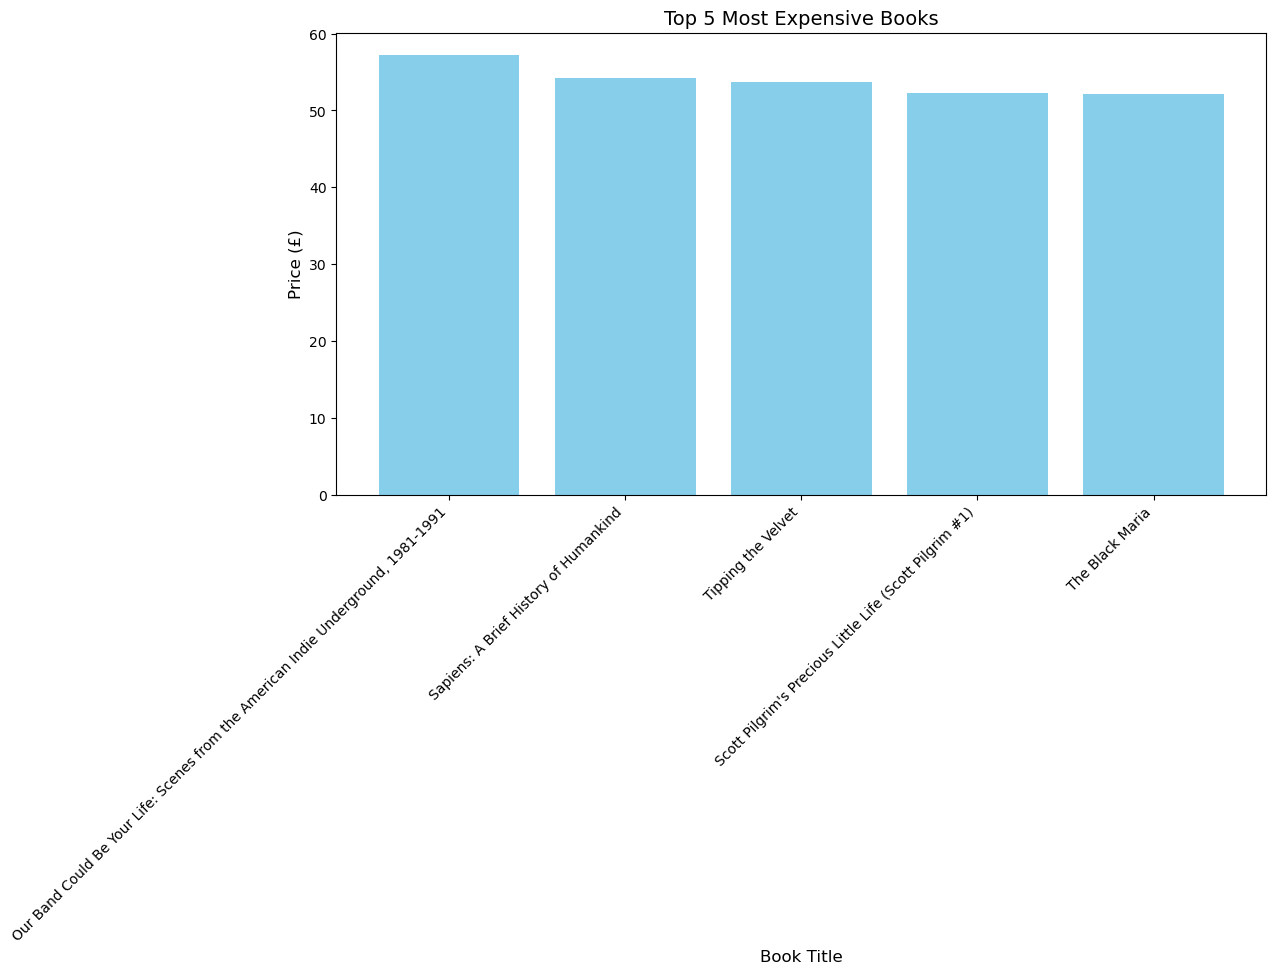

In [127]:
# Sort the DataFrame and select the top 5 most expensive books
book_price = df.sort_values(by='Price', ascending=False).head(5)

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(book_price['Title'], book_price['Price'], color='skyblue')

# Customize the chart
plt.xlabel('Book Title', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.title('Top 5 Most Expensive Books', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)


# Show the chart
plt.show()

   

#### The bar chart shows 5 books with the highest prices from the ebook store.

#### Check the Average book price by rating

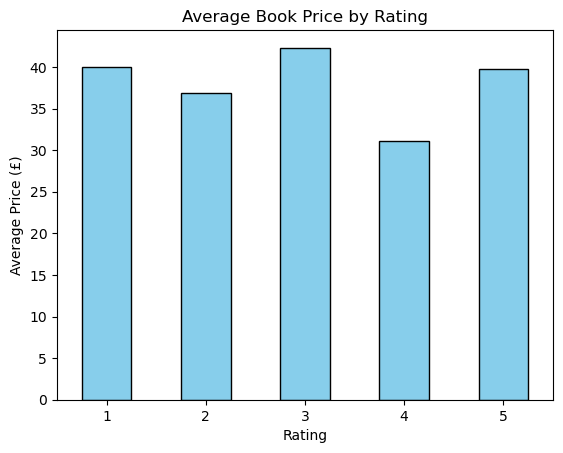

In [128]:
# Grouping data by Ratings and calculating the mean price for each rating
rating_price = df.groupby('Ratings')['Price'].mean()

# Plotting a bar chart
rating_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Book Price by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=0)
plt.show()

#### Show Proportion of Books Availability

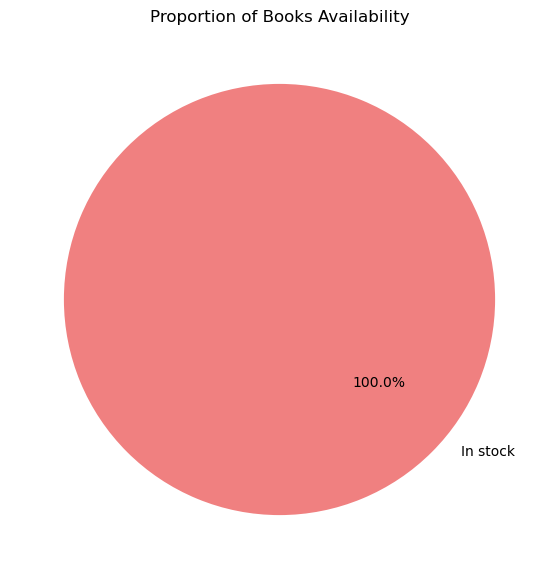

In [129]:
availability_counts = df['Availability'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(7,7))
plt.pie(availability_counts, labels=availability_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=140)
plt.title('Proportion of Books Availability')
plt.show()

#### All books are available

### Conclusion
* From the above analysis, it shows that one can get a book for as low as £13.99, and  Books are generally listed as "in stock," indicating that the platform maintains good availability.
* Books with the highest ratings are not necessarily expensive or sold at a high price. The ratings of the books vary, with certain books receiving consistently high ratings, indicating a high level of satisfaction among readers. The presence of multiple books with the highest rating suggests that the platform provides quality content, ensuring positive user experiences.
*  The eBook store offers a diverse selection of books across multiple genres, including fiction, non-fiction, and specialized categories, making it an appealing platform for various types of readers.

### Recomendation
* More details could be given on stock updates and restocks for better transparency
* Books with high ratings can be 
* On the ebook store, each book's genre sholud be indicated alongside with the book title, ratings and prices.